Multi Processing and Threading

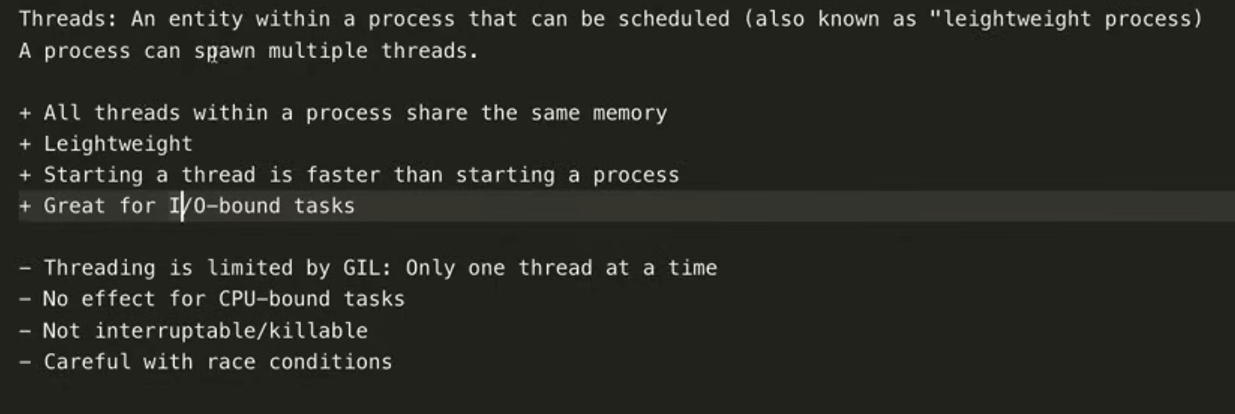

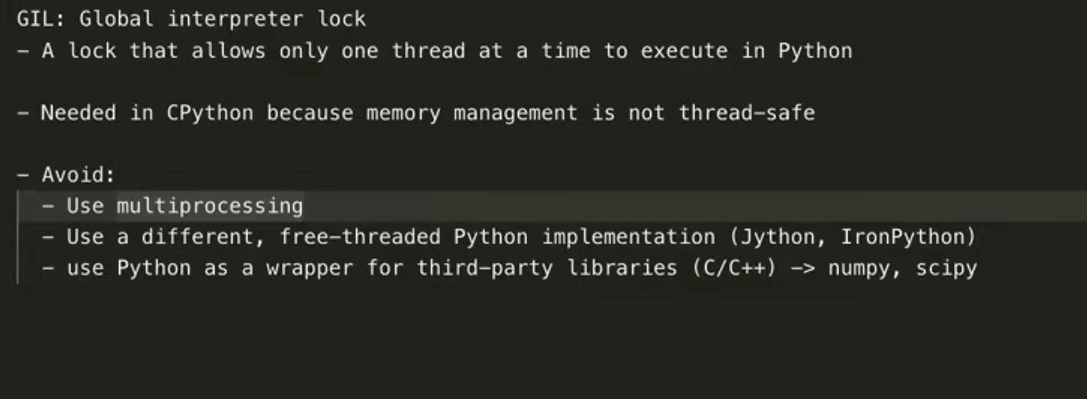

In [ ]:
# GIL  - Global Interpreter Lock 
# - A mutex that protects access to Python objects, preventing multiple threads from executing Python bytecodes at once.
# Multithreading vs Multiprocessing
# Concurrency vs Parallelism
# I/O Bound vs CPU Bound


In [1]:
from multiprocessing import Process
import os
def task(n):
    print(f"Process ID: {os.getpid()}, Task Number: {n}")
def square(n):
    print(f"Process ID: {os.getpid()}, Square of {n}: {n*n}")
Processes = []
num_processes = os.cpu_count()

for i in range(num_processes):
    # Process.start(i)
    p = Process(target=square, args=(i,))
    Processes.append(p)
for p in Processes:
    p.start()
for p in Processes:
    p.join()
print("end main")

Process ID: 14478, Square of 0: 0
Process ID: 14481, Square of 1: 1
Process ID: 14488, Square of 2: 4
Process ID: 14491, Square of 3: 9
Process ID: 14496, Square of 4: 16
Process ID: 14501, Square of 5: 25
Process ID: 14507, Square of 6: 36
Process ID: 14512, Square of 7: 49
Process ID: 14517, Square of 8: 64
Process ID: 14522, Square of 9: 81
Process ID: 14527, Square of 10: 100
Process ID: 14532, Square of 11: 121
Process ID: 14537, Square of 12: 144
Process ID: 14542, Square of 13: 169
Process ID: 14547, Square of 14: 196
Process ID: 14552, Square of 15: 225
end main


In [3]:
from multiprocessing import Process
from threading import Thread
import os
def task(n):
    print(f"Process ID: {os.getpid()}, Task Number: {n}")
def square(n):
    print(f"Process ID: {os.getpid()}, Square of {n}: {n*n}")
Threads = []
num_threads = 10

for i in range(num_threads):
    # Create a thread for the square function
    t = Thread(target=square, args=(i,), name=f"Square-Thread-{i}")
    # Create a thread for the task function
    t1 = Thread(target=task, args=(i,), name=f"Task-Thread-{i}")
    
    # Add both threads to the list
    Threads.append(t)
    Threads.append(t1)
    
    print(f"Created: {t.name} (ID: {t.ident}, Alive: {t.is_alive()})")
    print(f"Created: {t1.name} (ID: {t1.ident}, Alive: {t1.is_alive()})")

print(f"\nTotal threads created: {len(Threads)}")
print(f"Main thread ID: {os.getpid()}")
for t in Threads:
    t.start()
for t in Threads:
    t.join()
print("end main")

Created: Square-Thread-0 (ID: None, Alive: False)
Created: Task-Thread-0 (ID: None, Alive: False)
Created: Square-Thread-1 (ID: None, Alive: False)
Created: Task-Thread-1 (ID: None, Alive: False)
Created: Square-Thread-2 (ID: None, Alive: False)
Created: Task-Thread-2 (ID: None, Alive: False)
Created: Square-Thread-3 (ID: None, Alive: False)
Created: Task-Thread-3 (ID: None, Alive: False)
Created: Square-Thread-4 (ID: None, Alive: False)
Created: Task-Thread-4 (ID: None, Alive: False)
Created: Square-Thread-5 (ID: None, Alive: False)
Created: Task-Thread-5 (ID: None, Alive: False)
Created: Square-Thread-6 (ID: None, Alive: False)
Created: Task-Thread-6 (ID: None, Alive: False)
Created: Square-Thread-7 (ID: None, Alive: False)
Created: Task-Thread-7 (ID: None, Alive: False)
Created: Square-Thread-8 (ID: None, Alive: False)
Created: Task-Thread-8 (ID: None, Alive: False)
Created: Square-Thread-9 (ID: None, Alive: False)
Created: Task-Thread-9 (ID: None, Alive: False)

Total threads creat

Share data between threads

In [ ]:
# Share data between processes using multitreading
from threading import Thread, current_thread
import time

database_value = 0

if __name__ == "__main__":
    def increase_value():
        global database_value
        local_copy = database_value
        local_copy += 1
        database_value = local_copy

    threads = []
    for _ in range(100):
        t = Thread(target=increase_value)
        threads.append(t)
        t.start()
        # Print metadata about threads and shared data
        print(f"\nTotal threads created: {len(threads)}")
        print(f"All threads started, now waiting for completion...")
        print(f"Database value during execution: {database_value}")
    for t in threads:
        t.join()

    print(f"Final database value: {database_value}")


Total threads created: 1
All threads started, now waiting for completion...
Database value during execution: 1

Total threads created: 2
All threads started, now waiting for completion...
Database value during execution: 2

Total threads created: 3
All threads started, now waiting for completion...
Database value during execution: 3

Total threads created: 4
All threads started, now waiting for completion...
Database value during execution: 4

Total threads created: 5
All threads started, now waiting for completion...
Database value during execution: 5

Total threads created: 6
All threads started, now waiting for completion...
Database value during execution: 6

Total threads created: 7
All threads started, now waiting for completion...
Database value during execution: 7

Total threads created: 8
All threads started, now waiting for completion...
Database value during execution: 8

Total threads created: 9
All threads started, now waiting for completion...
Database value during execu